### Optimize and Save : Petrol - Gradient Bosting as our best algorithms

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load data
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')

#Create a new column
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)

# Remove the outlier which is less that 350 
#data = data.loc[(data['BFP'] > 350)]

print(data.head())

# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = data[['Avg_Brent_Crude', 'Ex_Rate']].values, data['Petrol']

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

        Date      BFP  Ex_Rate  Avg_Brent_Crude  Petrol  Crude_Rands
0 2010-01-01  406.263   7.5246            74.31   786.0   559.153026
1 2010-02-01  424.263   7.4735            76.84   804.0   574.263740
2 2010-03-01  430.563   7.6902            73.17   810.3   562.691934
3 2010-04-01  453.063   7.4753            78.89   858.3   589.726417
4 2010-05-01  465.063   7.3749            85.75   871.8   632.397675
Training Set: 117 rows
Test Set: 30 rows


GradientBoostingRegressor() 

MSE: 2785.0018296595326
RMSE: 52.77311654298553
R2: 0.9690939389448499


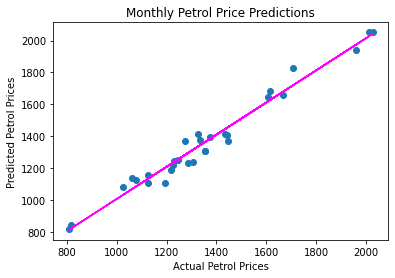

In [2]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor


# Fit a Gradient Boosting model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Petrol Prices')
plt.ylabel('Predicted Petrol Prices')
plt.title('Monthly Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Optimize Hyperparameters

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 60} 

GradientBoostingRegressor(n_estimators=60) 

MSE: 2750.7327965318573
RMSE: 52.44742888390104
R2: 0.9694742334275556


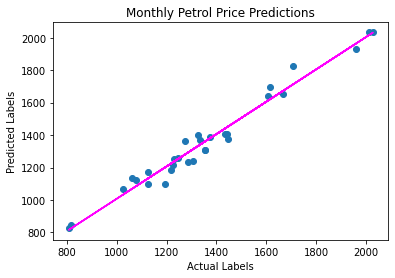

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.7, 1.0],
 'n_estimators' : [20, 40, 60]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Monthly Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Use the Trained Model

In [4]:
import joblib
import numpy as np

# Save the model as a pickle file
filename = './petrol-prediction.pkl'
joblib.dump(model, filename)

['./petrol-prediction.pkl']

In [5]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[115, 15.23]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} Petrol Price'.format(np.round(result[0])))

New sample: [115.0, 15.23]
Prediction: 2130 Petrol Price


Estimate Petrol Increment

In [6]:
print('Estimate increment :',(result - data['Petrol'].iloc[-1]))

Estimate increment : [-29.116138]
